### Exploration task

In this Notebook the question of whether CO2 Emissions per Capita is connected to where the city is geographically located in the world will be investigated. To answer this question applying statistical significance testing will be attempted using the ordinary least squares method as well as attempting to visually see if clustering of CO2 Emissions in every city can be seen in regards to the region which the cities are located. 

In [1]:
# Want to find out if df['CO2 Emissions per Capita (metric tonnes)'] is affected by what Country the city is located

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import seaborn as sns
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.


In [3]:
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8

In [4]:
df = df.rename(columns={"CO2 Emissions per Capita (metric tonnes)": "Target"})
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),Target,Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8,0.0,0.000000,0.000000,0.000000,0,

In [5]:
dummy = pd.get_dummies(df['Country'])
dummy.head()

,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Benin,Bolivia,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chad,Chile,China,Colombia,Congo,Costa Rica,Cuba,Czech Republic,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Ethiopia,Finland,France,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hong Kong,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Lebanon,Liberia,Libya,Madagascar,Malaysia,Mali,Mauritania,Mexico,Mongolia,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Somalia,South Africa,South Korea,Spain,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Togo,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
url = 'https://stats.idre.ucla.edu/stat/data/hsb2.csv'

hsb2 = pd.read_csv(url)
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [7]:
# df['CO2 Emissions per Capita (metric tonnes)']

In the code cell below the OLS method is used on the target variable (CO2 Emission) to see if it is significantly dependent on the variable Conutry. As seen from summary below the p values do not indicate significance for most countries. However to see if we can visualize this we will attempt to make a plot of the cities depending on the region which the cities are located. 

In [8]:
mod = ols("Target ~ Country", data=df)
# mod = ols("write ~ C(race)", data=hsb2)
res = mod.fit()
print(res.summary())
# The summary shows that although p values differ between countries, generally the country is not significant.


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     5.555
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.82e-27
Time:                        15:46:35   Log-Likelihood:                -849.27
No. Observations:                 331   AIC:                             1947.
Df Residuals:                     207   BIC:                             2418.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [9]:
# Will try to see if clustering the pollution of cities reveals anything about its location in the world. 

In [10]:
df['Country'].unique()

array(['United States', 'Australia', 'Niger', 'Vietnam', 'China',
       'France', 'Uruguay', 'Poland', 'Russia', 'India', 'Philippines',
       'Ivory Coast', 'Cameroon', 'United Arab Emirates', 'Ukraine',
       'Nicaragua', 'Nepal', 'Bangladesh', 'Pakistan', 'United Kingdom',
       'Angola', 'Bolivia', 'Iraq', 'Morocco', 'Germany', 'Algeria',
       'Kenya', 'Spain', 'South Korea', 'Malaysia', 'Canada', 'Finland',
       'Turkey', 'Ireland', 'Mexico', 'Somalia', 'Peru', 'Indonesia',
       'Libya', 'Democratic Republic of the Congo', 'Myanmar', 'Italy',
       'Chile', 'Thailand', 'Netherlands', 'Japan', 'Madagascar',
       'Brazil', 'Slovakia', 'Hungary', 'South Africa', 'Paraguay',
       'Iran', 'Greece', 'Chad', 'Israel', 'Venezuela', 'New Zealand',
       'Egypt', 'Argentina', 'Uganda', 'Syria', 'Saudi Arabia',
       'Portugal', 'Denmark', 'Serbia', 'Burkina Faso', 'Ecuador',
       'Colombia', 'Mozambique', 'Tunisia', 'Nigeria', 'Sierra Leone',
       'Singapore', 'Belarus'

In [2]:
len(df['City'].unique())
country_group = df.groupby('Country')
city_df = country_group.apply(lambda x: x['City'].unique())

In [12]:
cities_usa = list(city_df['United States'])
# cities_usa

We want to add a column which holds information on which region of the world each city is located. To do this, coordinates for each city will be added and then depending on the coordinate positioning each country will be added to a certain world region (such as, south Europe, east Asia, Oceania etc.).  

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="user_agent")
location = geolocator.geocode("Aurora, Colorado") # Melbourne
# print(location.address)
lat_long = (location.latitude, location.longitude)
print(lat_long[0], lat_long[1])

39.729432 -104.8319196


In [45]:
def add_coordinates(city):
    """
    This functon will add long. lat. coordinates for each city as a new column
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore"
    if city == "Birmingham(AL)":
        city = "Birmingham"
    if city == "Valencia(VZL)":
        city = "Valencia"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    if city == "Denver-Aurora(CO)":
        city = "Aurora, Colorado"
    geolocator = Nominatim(user_agent="user_agent")
#     print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)


In [15]:
# Testing a random city to see if the function works properly
x = add_coordinates("St. Petersburg, Florida")
print(x)

(27.7703796, -82.6695085)


In [44]:
# Apply the add_coordinates function to the dataframe to produce coordinates for each city
df["coordinates"] = df["City"].apply(add_coordinates)

Baltimore
Melbourne
Niamey
Hanoi
Urumqi
Milwaukee(WI)
Paris
Montevideo
Krakow
Yekaterinburg
Pune
Cebu
Abidjan
Austin(TX)
Yaounde
Delhi
Hefei
Dubai
Chicago(IL)
Dalian
Ho Chi Minh City
Kharkiv
Managua
Kathmandu
Chittagong
Karachi
Glasgow
Huambo
Santa Cruz
Lille
Baghdad
Rabat
Chongqing
Cologne-Bonn
Algiers
Bangalore
Mombasa
Barcelona
Ulsan
Johor Bahru
Atlanta(GA)
Samara
Toronto
Helsinki
Bursa
Los Angeles(CA)
Dublin
Acapulco
Mogadishu
Nizhny Novgorod
Lima
Richmond(VA)
Surabaya
Tucson(AZ)
Chengdu
Tripoli
Hamburg
Las Vegas(NV)
Chihuahua
Lubumbashi
Boston(MA)
Mandalay
Istanbul
Rome
Berlin
Concepcion
Lahore
Nashville-Davidson(TN)
Aurora, Colorado
Bangkok
Louisville(KY)
Rotterdam-Hague
Fukuoka-Kitakyushu
Antananarivo
Montreal
Detroit(MI)
Douala
Wuhan
Changsha
Belo Horizonte
Mumbai
Bratislava
Davao
Jinan
Budapest
Shenzhen
Johannesburg
Mexico City
Naples
Guangzhou
Asuncion
Abu Dhabi
Milan
Bordeaux
New York(NY)
Tabriz
Thessaloniki
N'Djamena
Birmingham
Tel Aviv
Newcastle upon Tyne
Ottawa
Valencia
O

In [ ]:
df["coordinates"].head()

In [ ]:

def geo_position(country, coordinates):
    """
    This function produces the regions of where a city is located depending on its coordinates.
    """
    # Some of the countries coord. are hard to capture, so they will be hard coded
    if country in ['Finland', 'Denmark', 'Sweden', 'Iceland', 'Norway']:
        return 'Nordic'
    if country == 'United States':
        return 'USA'
    if country == 'Canada':
        return 'Canada'
    if country == 'Russia':
        return 'Russia'
#     if country == 'Australia':
#         return 'Australia'
    if country in ['India', 'Bangladesh']:
        return 'West Asia'
#     if country == 'Bangladesh':
#         return 'West Asia'
    if country in ['Australia', 'New Zealand']:
        return 'Oceania'
#     if country == 'Australia':
#         return 'Australia'
    # coordnates[0] = 'latitude', coordnates[1] = 'longitude'
    # South America
    if coordinates[1] < float(28.0) and coordinates[1] > float(-130.0):
        if coordinates[0] < float(30) and coordinates[0] > float(2.5):
            return 'North South America'
        if coordinates[0] < float(2.5) and coordinates[0] > float(-34.0):
            return 'Mid South America'
        if coordinates[0] < float(-34.0):
            return 'South South America'
    # West Europe    
    if coordinates[0] < float(59.0) and coordinates[0] > float(46.0) and coordinates[1] < float(15.22) and coordinates[1] > float(-11):
        return 'West Europe'
    # South Europe
    if coordinates[0] < float(46.0) and coordinates[0] > float(35.45) and coordinates[1] < float(21.11) and coordinates[1] > float(-10):
        return 'South Europe'
    # East Europe
    if coordinates[0] < float(59.0) and coordinates[0] > float(39.0) and coordinates[1] < float(50.0) and coordinates[1] > float(15.22):
        return 'East Europe'
    # Middle East
    if coordinates[0] < float(39.3) and coordinates[0] > float(12.0) and coordinates[1] < float(71) and coordinates[1] > float(34):
        return 'Middle East'
    # West Asia
    if coordinates[0] < float(46.0) and coordinates[0] > float(23) and coordinates[1] < float(100) and coordinates[1] > float(73):
        return 'West Asia'
    # East Asia
    if coordinates[0] < float(49.2) and coordinates[0] > float(23.7) and coordinates[1] < float(150) and coordinates[1] > float(100):
        return 'East Asia'
    # South East Asia
    if coordinates[0] < float(23.7) and coordinates[0] > float(-16.0) and coordinates[1] < float(169) and coordinates[1] > float(92):
        return 'South East Asia'
    # Africa
    if coordinates[0] < float(37.0) and coordinates[0] > float(-35.0) and coordinates[1] < float(52) and coordinates[1] > float(-19):
        return 'Africa'
    else:
        return 'OTM'

In [ ]:
# Apply geo_position function to dataframe
df["region"] = df.apply(lambda x: geo_position(x['Country'], x['coordinates']), axis=1)

In [ ]:
df[['City', "region", 'coordinates']].head()
# sum(df['region'].isna())


In [21]:
len(df['region'].unique())

17

Now that we have added coordinates and regions to each datapoint in our dataframe we can plot them and see if the regions cluster around the same levels of CO2 Emission. 

As seen below the plot is relativly uniform and it seems that CO2 Emission can not be explained simply by the region which cities are located. This means that there must be other variables which CO2 Emission is dependent upon. 

<Figure size 4000x3200 with 0 Axes>

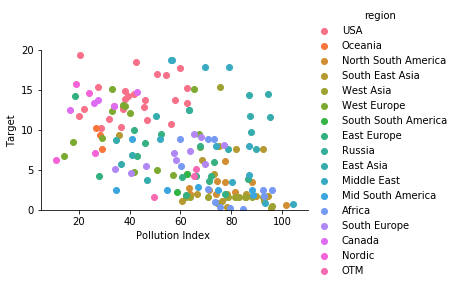

In [22]:
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
# 'Target', 'Pollution Index '
# Make 18 different random colors, one for each unique region
colors = []
for i in range(0, len(df['region'].unique())):
    rgb = (np.random.random(), np.random.random(), np.random.random())
    colors.append(rgb)
figure(num=None, figsize=(50, 40), dpi=80, facecolor='w', edgecolor='k')
df_plot = df[['Pollution Index ', 'Target', 'region']]
fg = seaborn.FacetGrid(data=df_plot, hue='region', aspect=1.61, ylim=(0,20))
fg.map(pyplot.scatter, 'Pollution Index ','Target').add_legend()
# region_group = df.groupby('region')
# region_group.get_group('Country').head()
# city_df = country_group.apply(lambda x: x['City'].unique())
# points = df[['Target', 'Pollution Index ']]
# for x, y in zip(x_)
# plt.scatter(points['Target'], points['Pollution Index '], c=df['region'].unique(), cmap='viridis')

## Difference in GDP depedning on distance from the equater
In this section, the distance from the equator will be compared to various economical variables (such as GDP). Things that will be investigated are:
- Check where the worlds wealth is located (distance from the equater), plot?
- Where is the worlds population located? 80% is closer than a certain city/ country? 
- Plot cumalative GDP and population (barplot and sorted distance from eq.). (take away middle east countries?)

In [21]:
df.columns

Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car Modeshare (%)', 'Public Transit Modeshare (%)',
       'Bicycle Modeshare (%)', 'Walking Modeshare (%)',
       'Gasoline Pump Price (USD/liter)', 'Road Deaths Rate (per 1000)',
       'Subway Length (km)', 'Subway Length Density (per km)',
       'Subway Stations per Hundred Thousand', 'Subway Ridership per Capita',
       'Subway Age (years)', 'BRT Length (km)',
       'BRT System Length Density (per km)',
       'BRT Stations per Hundred Thousand Persons',
       'BRT Fleet per Hundred Thousand Persons',
       'BRT Annual Ridership per Capita', 'BRT Age (years)',
       'Bikeshare Stations', 'Bikeshare Stations per Hundred Thousand Persons',
       'Bikeshare Number of Bikes',
       'Bikeshare Bicycles per Hundred Thousand Persons',
       'Bikeshare Age (years)', 'Congestion (%)', 'Congestion AM Peak (%)',
       'Congestion PM Peak (%)', 'Traffic Index', 'Travel Time Index',
       'Inefficiency Index', 'Po

In [22]:
# Look at variables of interest
df[['City', 'cityID', 'Country', 'coordinates']].head() #

,City,cityID,Country,coordinates
284,Baltimore(MD),285,United States,"(39.2908816, -76.610759)"
9,Melbourne,10,Australia,"(-37.8142176, 144.9631608)"
185,Niamey,186,Niger,"(13.524834, 2.109823)"
327,Hanoi,328,Vietnam,"(21.0294498, 105.8544441)"
66,Urumqi,67,China,"(43.419754, 87.319461)"


In [43]:
df.loc[df['City']=='Baltimore(MD)']['coordinates']

KeyError: 'coordinates'

In [46]:
# Function to define distance in km from equater
def eq_dist(coord):
    # 1 degree is about 111.045 km
    dist = coord[0]*111.045
    return int(abs(dist)) # Make distances south of equater positive.

df["eq_dist"] = df["coordinates"].apply(eq_dist)
# Make sure everything looks ok.
df[['City', 'cityID', 'Country', 'coordinates', 'eq_dist']].head()

,City,cityID,Country,coordinates,eq_dist
284,Baltimore(MD),285,United States,"(39.2908816, -76.610759)",4363
9,Melbourne,10,Australia,"(-37.8142176, 144.9631608)",4199
185,Niamey,186,Niger,"(13.524834, 2.109823)",1501
327,Hanoi,328,Vietnam,"(21.0294498, 105.8544441)",2335
66,Urumqi,67,China,"(43.419754, 87.319461)",4821


In [49]:
df[['GDP per Capita (USD)', 'eq_dist']].head(300)

,GDP per Capita (USD),eq_dist
284,58789.00,4363
9,39358.00,4199
185,427.40,1501
327,3425.00,2335
66,12189.00,4821
296,56697.00,4778
89,71671.00,5425
321,14010.00,3876
200,16843.00,5559
208,11279.60,6311


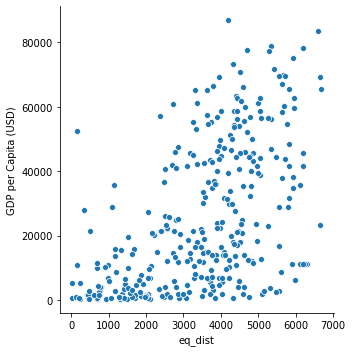

In [47]:
sns.relplot(x='eq_dist', y='GDP per Capita (USD)', data=df)

In [37]:
df2 = df
df2['target'] = df2['GDP per Capita (USD)']
mod = ols("target ~ eq_dist", data=df2)
# mod = ols("write ~ C(race)", data=hsb2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.72e-26
Time:                        12:20:21   Log-Likelihood:                -3727.9
No. Observations:                 331   AIC:                             7460.
Df Residuals:                     329   BIC:                             7467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -835.8327   2479.973     -0.337      0.7